# データ・パッケージの読込

## パッケージ読み込み

In [1]:
### 必要なパッケージ（ライブラリ）の読み込み ###
import pandas as pd             # データフレーム型変数を取り扱えるパッケージ"pandas"を読込み（以降"pd"と略記）
import matplotlib.pyplot as plt # グラフ描画のパッケージ"matplotlib"を読込み（以降"plt"と略記）
import seaborn as sns           # 上記matplotlibをベースにした高機能可視化モジュール"saeborn"を読込み（以降"sns"と略記）
import numpy as np              # 数値演算のためのパッケージ"numpy"を読込み（以降"np"と略記）

## 参考：描画設定
※重なりなどの描画崩れや、文字化けなど、描画がうまくいかない場合

In [2]:
### 以下、描画の細かいデザイン設定 ###

# 出力されるグラフ画像の解像度を上げる
%config InlineBackend.figure_formats = {'png', 'retina'}

# グラフのサイズ指定
# plt.rcParams['figure.figsize'] = 10, 5

# 文字化け対策にフォント指定（Win/Macなどの環境に依らず、横断的に設定）
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao',
                                   'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# フォントサイズ一括指定
# plt.rcParams['font.size'] = 14

## データ読み込み

In [3]:
### データの読み込み ###
# 総合演習_印刷機_テスト条件データ.xlsx
df_conditions = pd.read_excel("./data/20240820/総合演習_印刷機_テスト条件データ.xlsx")
# 総合演習_印刷機_テスト結果データ.xlsx
df_results = pd.read_excel("./data/20240820/総合演習_印刷機_テスト結果データ.xlsx")

In [4]:
df_conditions

,テストNo,トルク,分離圧1,分離圧2,紙種
0,T001,245,209,40,1
1,T002,245,209,40,2
2,T003,245,209,40,3
3,T004,245,160,40,1
4,T005,245,160,40,2
...,...,...,...,...,...
105,T106,570,502,40,2
106,T107,570,502,40,3
107,T108,570,553,40,1
108,T109,570,553,40,2


In [5]:
df_results

,テストNo,頻度,試験回数,重送率,判定
0,T001,10,26,0.384615,1
1,T002,10,21,0.476190,1
2,T003,7,11,0.636364,1
3,T004,2,20,0.100000,1
4,T005,8,30,0.266667,1
...,...,...,...,...,...
105,T106,17,20,0.850000,0
106,T107,10,17,0.588235,0
107,T108,23,30,0.766667,0
108,T109,14,20,0.700000,0


## データ結合

In [6]:
### 製造データと品質データの結合 ###
df = pd.merge(df_conditions, df_results, on='テストNo', how='inner')        # 'テストNo'をキーとしてデータ結合（内部結合）

In [7]:
df

,テストNo,トルク,分離圧1,分離圧2,紙種,頻度,試験回数,重送率,判定
0,T001,245,209,40,1,10,26,0.384615,1
1,T002,245,209,40,2,10,21,0.476190,1
2,T003,245,209,40,3,7,11,0.636364,1
3,T004,245,160,40,1,2,20,0.100000,1
4,T005,245,160,40,2,8,30,0.266667,1
...,...,...,...,...,...,...,...,...,...
105,T106,570,502,40,2,17,20,0.850000,0
106,T107,570,502,40,3,10,17,0.588235,0
107,T108,570,553,40,1,23,30,0.766667,0
108,T109,570,553,40,2,14,20,0.700000,0


# データの理解（観察）

## データ概観把握

In [8]:
### 要約統計量 ###
df.describe()

,トルク,分離圧1,分離圧2,紙種,頻度,試験回数,重送率,判定
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,419.818182,342.327273,51.181818,2.018182,8.836364,17.672727,0.500000,0.500000
std,120.041903,130.517960,18.817414,0.823751,6.753222,6.465305,0.341776,0.502288
min,245.000000,108.000000,40.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,360.000000,249.000000,40.000000,1.000000,3.000000,10.000000,0.208333,0.000000
50%,365.000000,335.000000,40.000000,2.000000,8.500000,20.000000,0.500000,0.500000
75%,500.000000,450.000000,65.000000,3.000000,13.000000,20.000000,0.791667,1.000000
max,570.000000,600.000000,85.000000,3.000000,30.000000,30.000000,1.000000,1.000000


In [9]:
### 欠測値確認 ###
df.isnull().sum()      # 欠損値件数の出力 ※df.isnull()で各セルのデータが欠損値かどうかを判定

テストNo    0
トルク      0
分離圧1     0
分離圧2     0
紙種       0
頻度       0
試験回数     0
重送率      0
判定       0
dtype: int64

## データ可視化（グラフ）

### ヒストグラム

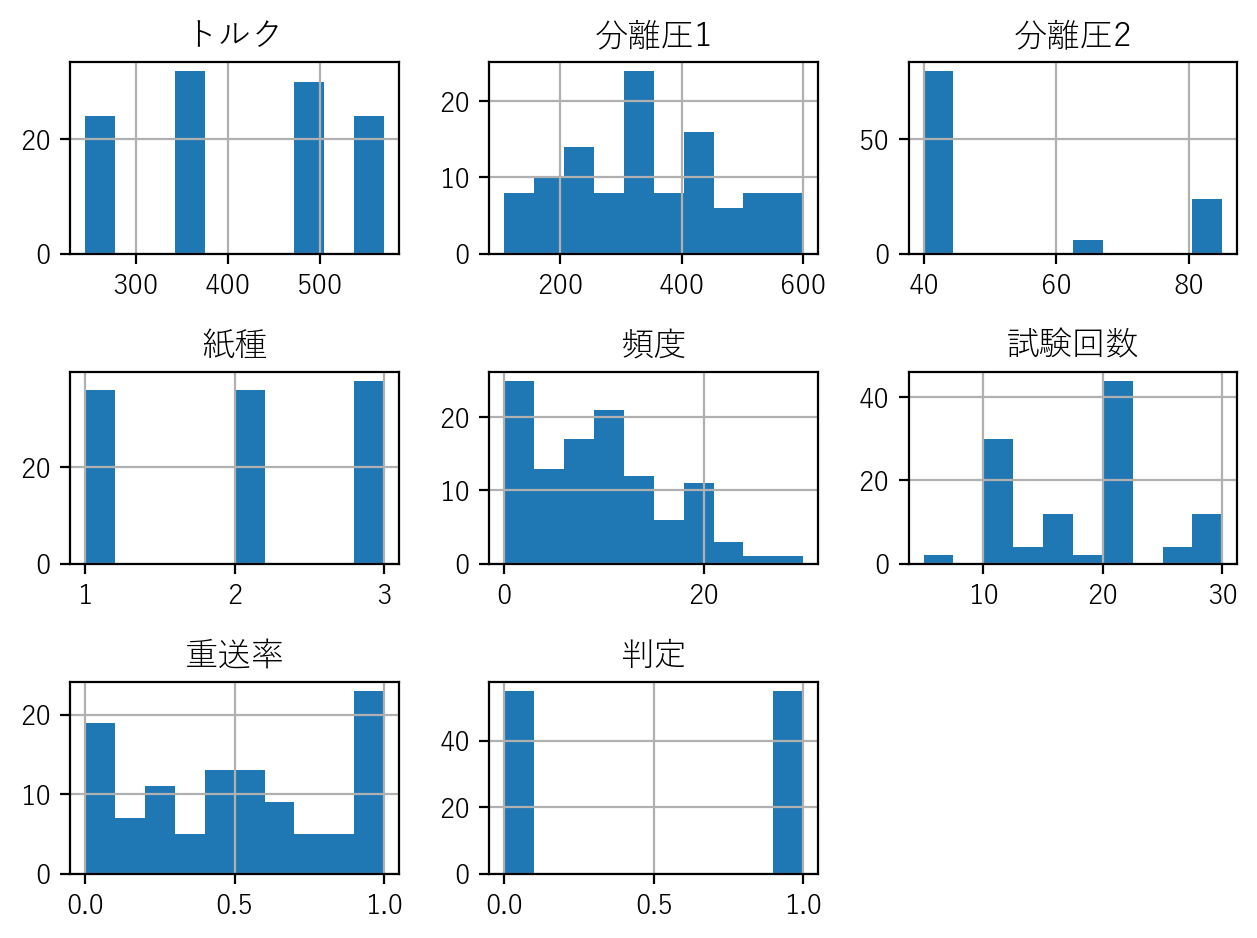

In [10]:
df.hist()

plt.tight_layout() #グラフ同士が重ならないように設定

In [11]:
# 「判定」列の内訳
df['判定'].value_counts()

判定
1    55
0    55
Name: count, dtype: int64

### 箱ひげ図

<Axes: >

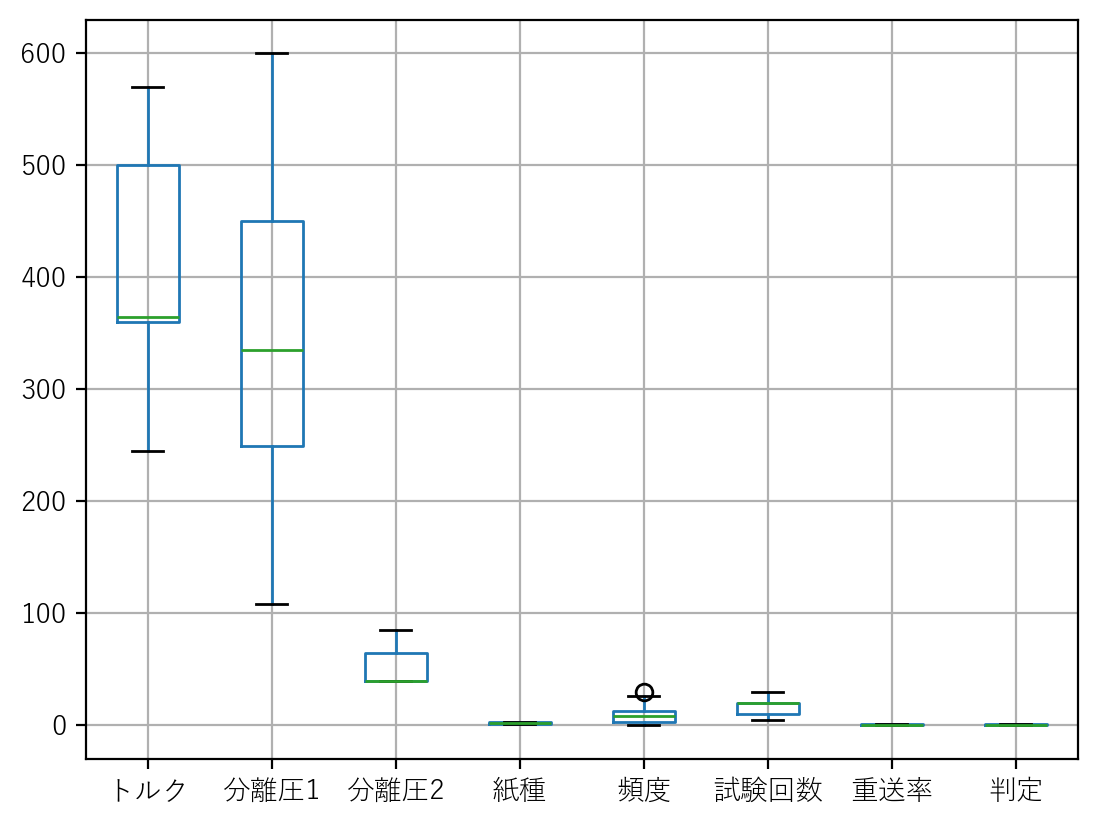

In [12]:
df.boxplot()

### 散布図

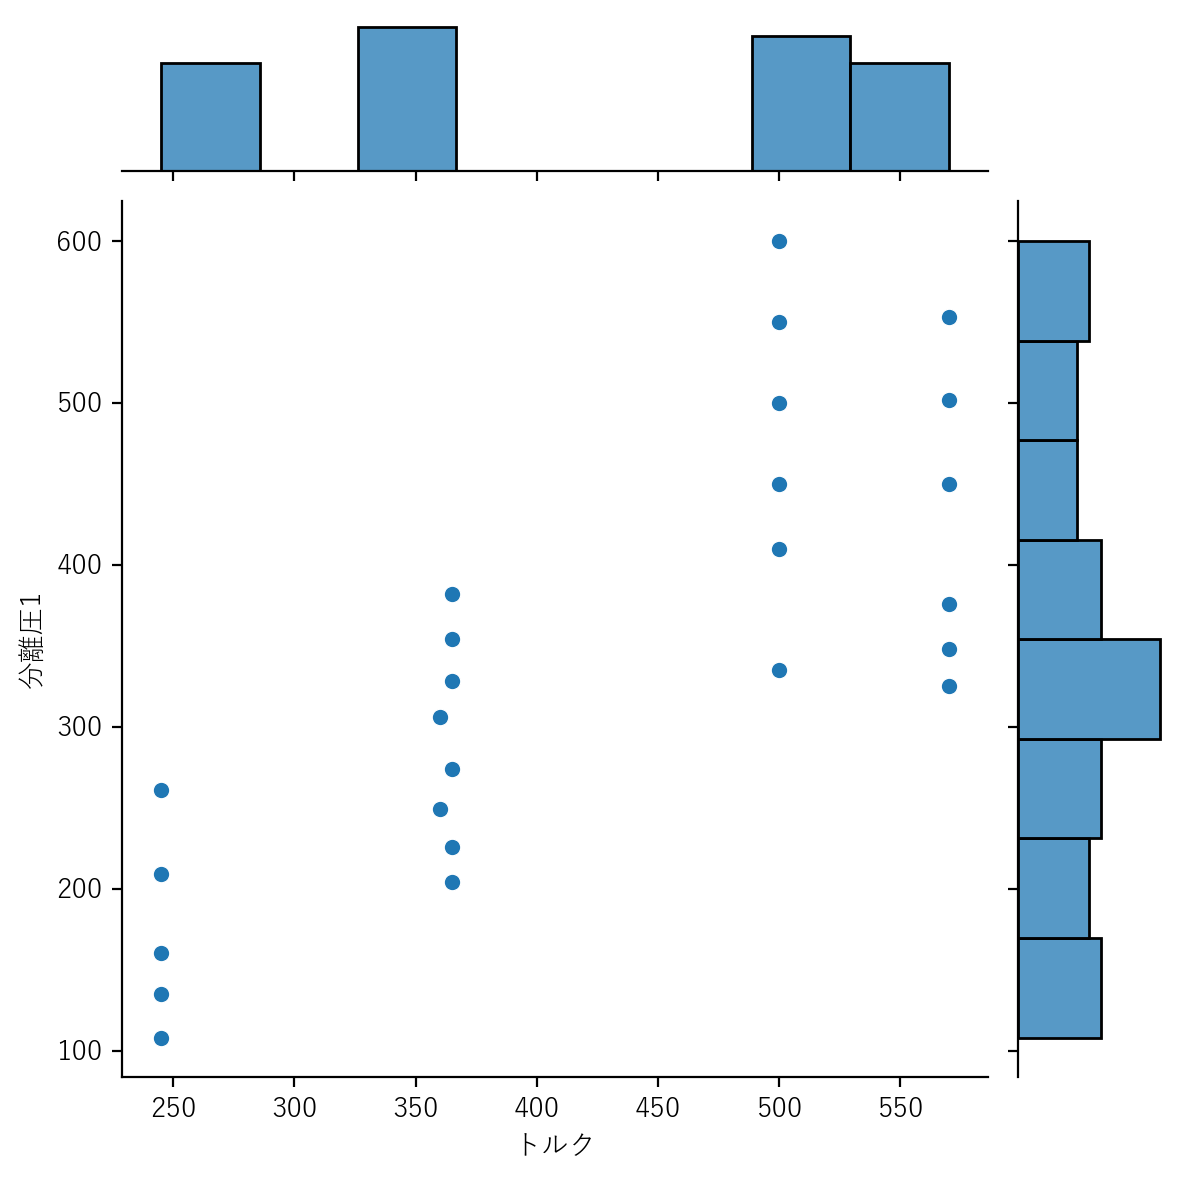

In [13]:
sns.jointplot(data=df, x='トルク', y='分離圧1')

### 散布図行列

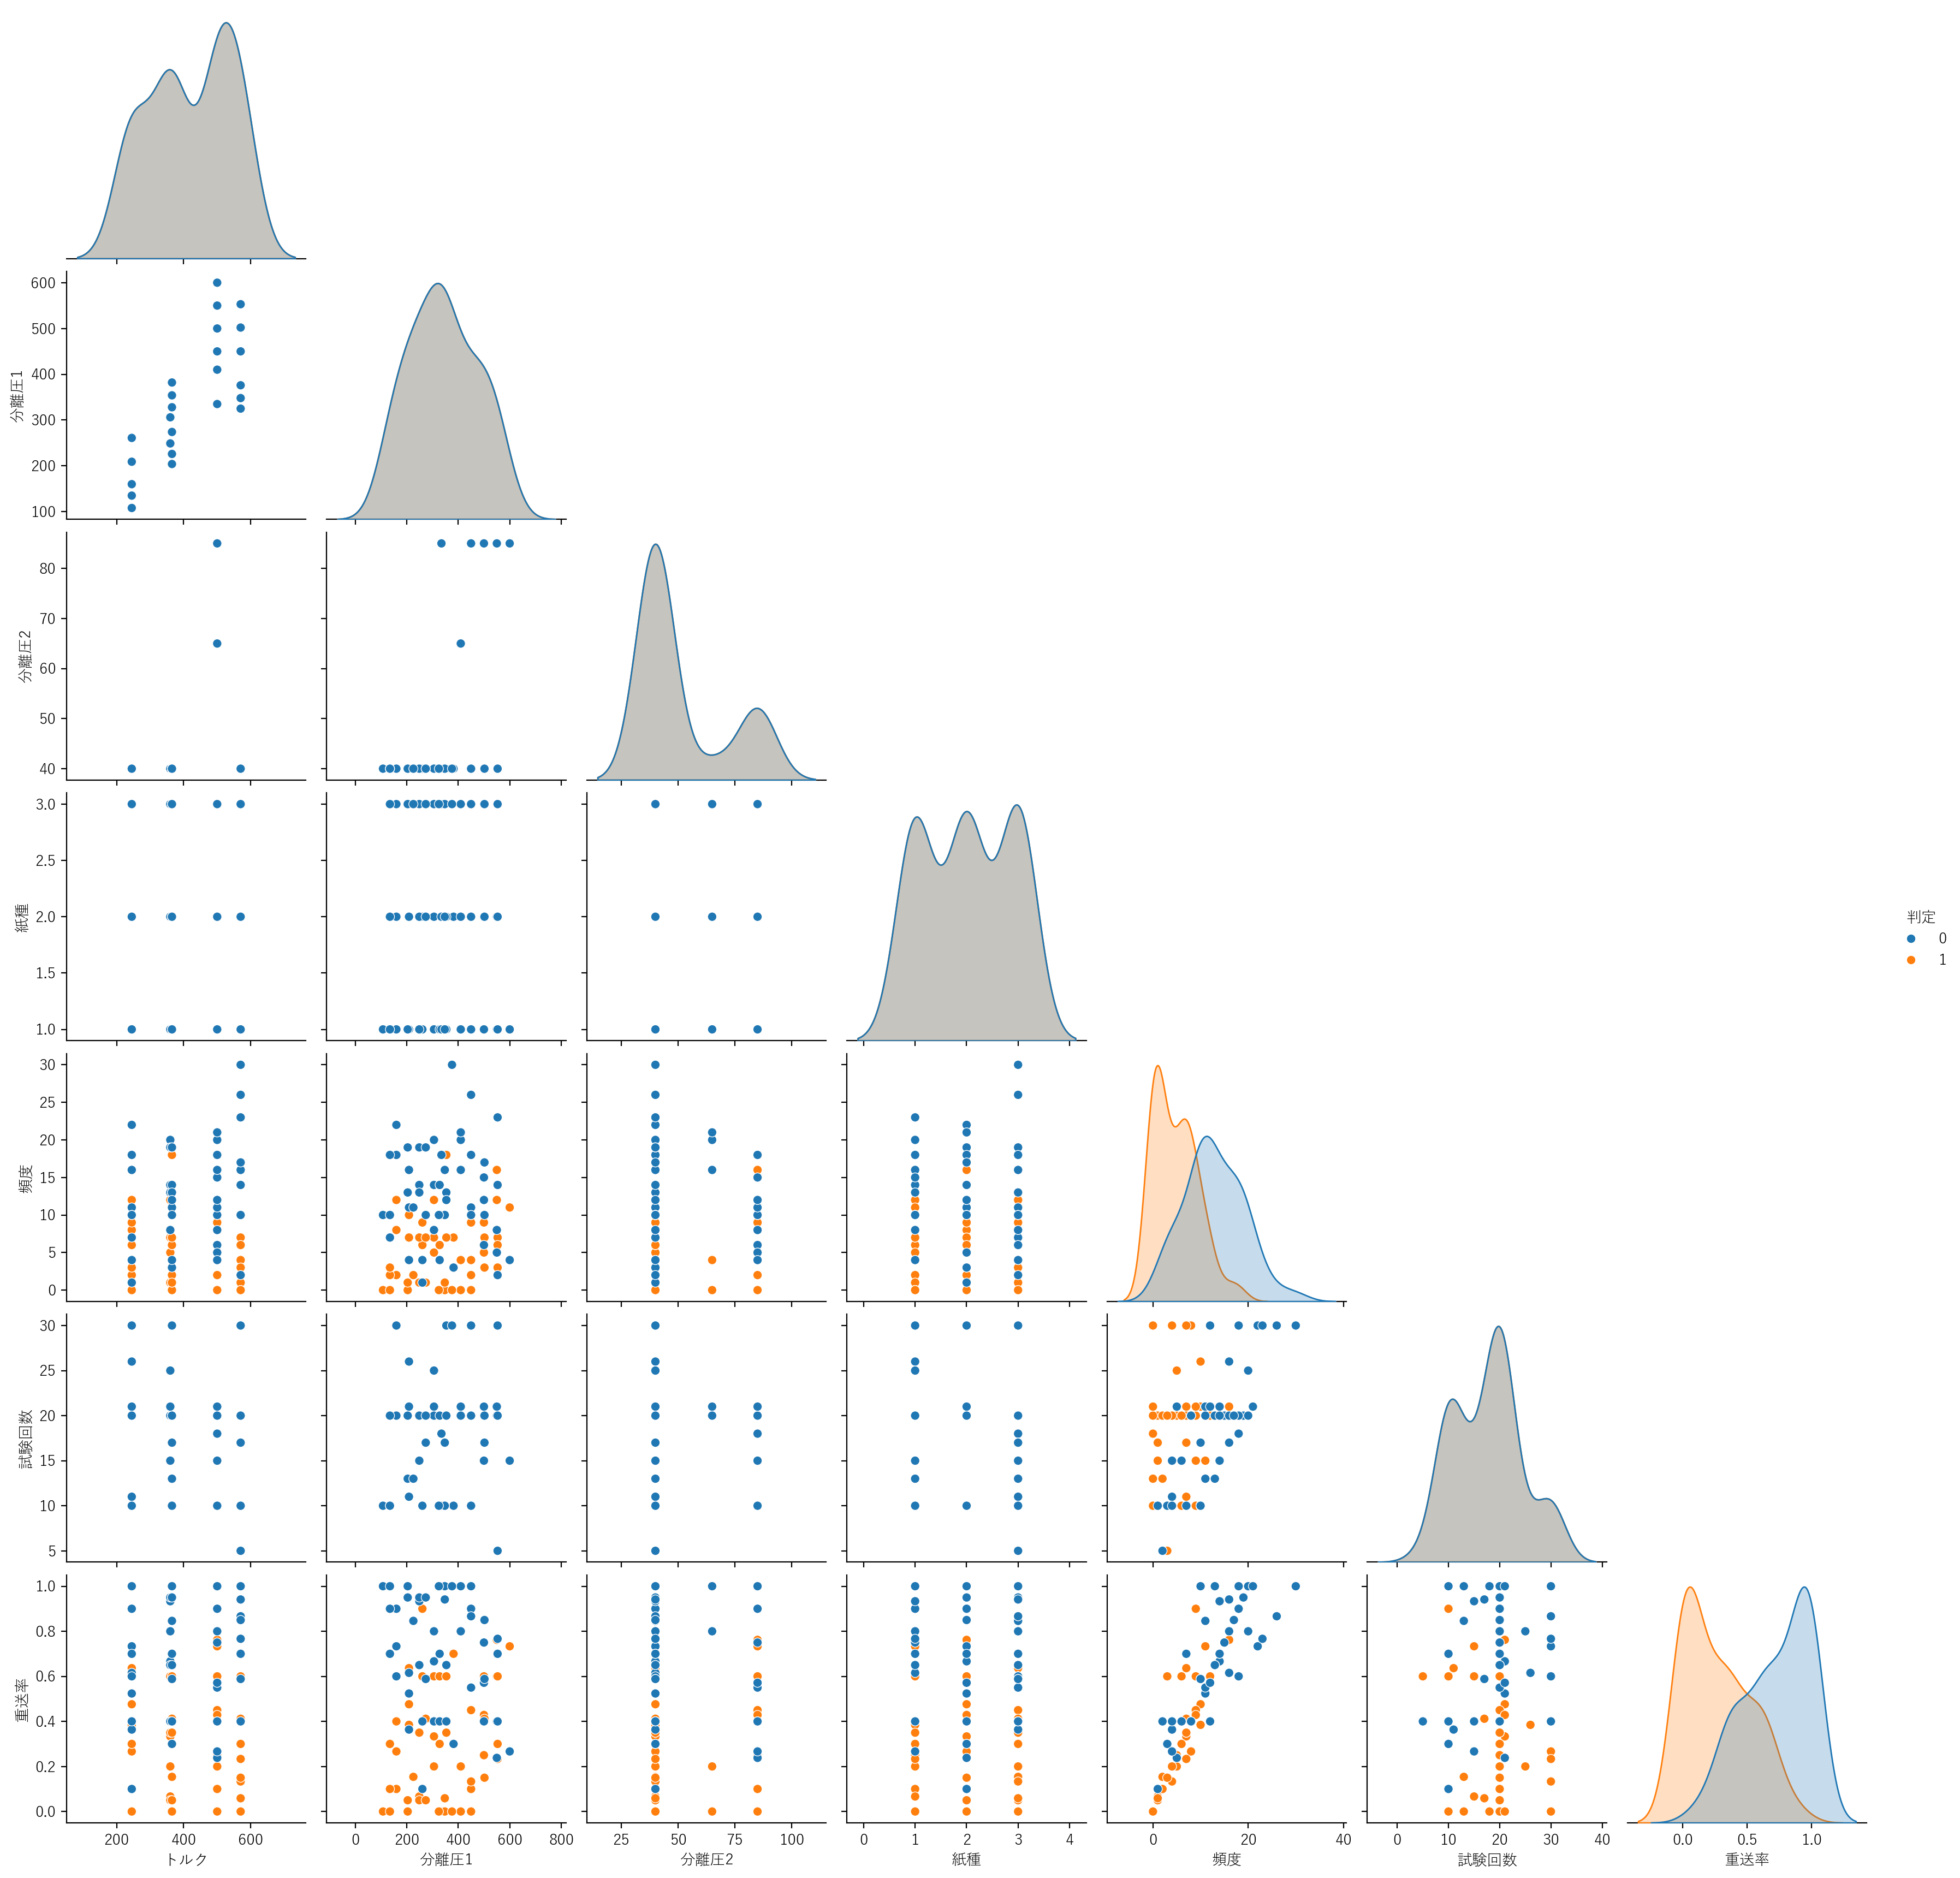

In [14]:
### 散布図行列による傾向確認 ###
sns.pairplot(df, corner=True, hue='判定')

In [17]:
# 「頻度」と「判定」の関係
df["頻度"]

0      10
1      10
2       7
3       2
4       8
       ..
105    17
106    10
107    23
108    14
109     2
Name: 頻度, Length: 110, dtype: int64

### 相関行列

In [18]:
### 相関行列による変数間の関係性確認 ###
df.corr(numeric_only=True)  # 相関行列の算出

# pandasのv2.0.0以降、数値以外のデータが入っているとエラーになるため、
# 数値以外を含む場合、数値データのみに絞り込むオプション numeric_only=True を指定する
# （今回のデータは数値のみなので、オプション無しでもエラーなく実行できる）

,トルク,分離圧1,分離圧2,紙種,頻度,試験回数,重送率,判定
トルク,1.000000e+00,8.275504e-01,4.005546e-01,1.364173e-01,-0.008695,-1.816340e-02,-8.810295e-16,1.046533e-15
分離圧1,8.275504e-01,1.000000e+00,5.244107e-01,-1.063691e-02,0.032515,6.792663e-02,-1.432114e-16,-2.843848e-16
分離圧2,4.005546e-01,5.244107e-01,1.000000e+00,-1.197706e-01,-0.024815,-5.184042e-02,1.479206e-16,-4.448467e-16
紙種,1.364173e-01,-1.063691e-02,-1.197706e-01,1.000000e+00,0.018681,3.902510e-02,-2.713358e-17,1.230849e-17
頻度,-8.694508e-03,3.251532e-02,-2.481513e-02,1.868065e-02,1.000000,4.786830e-01,8.196782e-01,-5.977253e-01
試験回数,-1.816340e-02,6.792663e-02,-5.184042e-02,3.902510e-02,0.478683,1.000000e+00,8.297080e-17,-1.756425e-16
重送率,-8.810295e-16,-1.432114e-16,1.479206e-16,-2.713358e-17,0.819678,8.297080e-17,1.000000e+00,-6.685255e-01
判定,1.046533e-15,-2.843848e-16,-4.448467e-16,1.230849e-17,-0.597725,-1.756425e-16,-6.685255e-01,1.000000e+00


<Axes: >

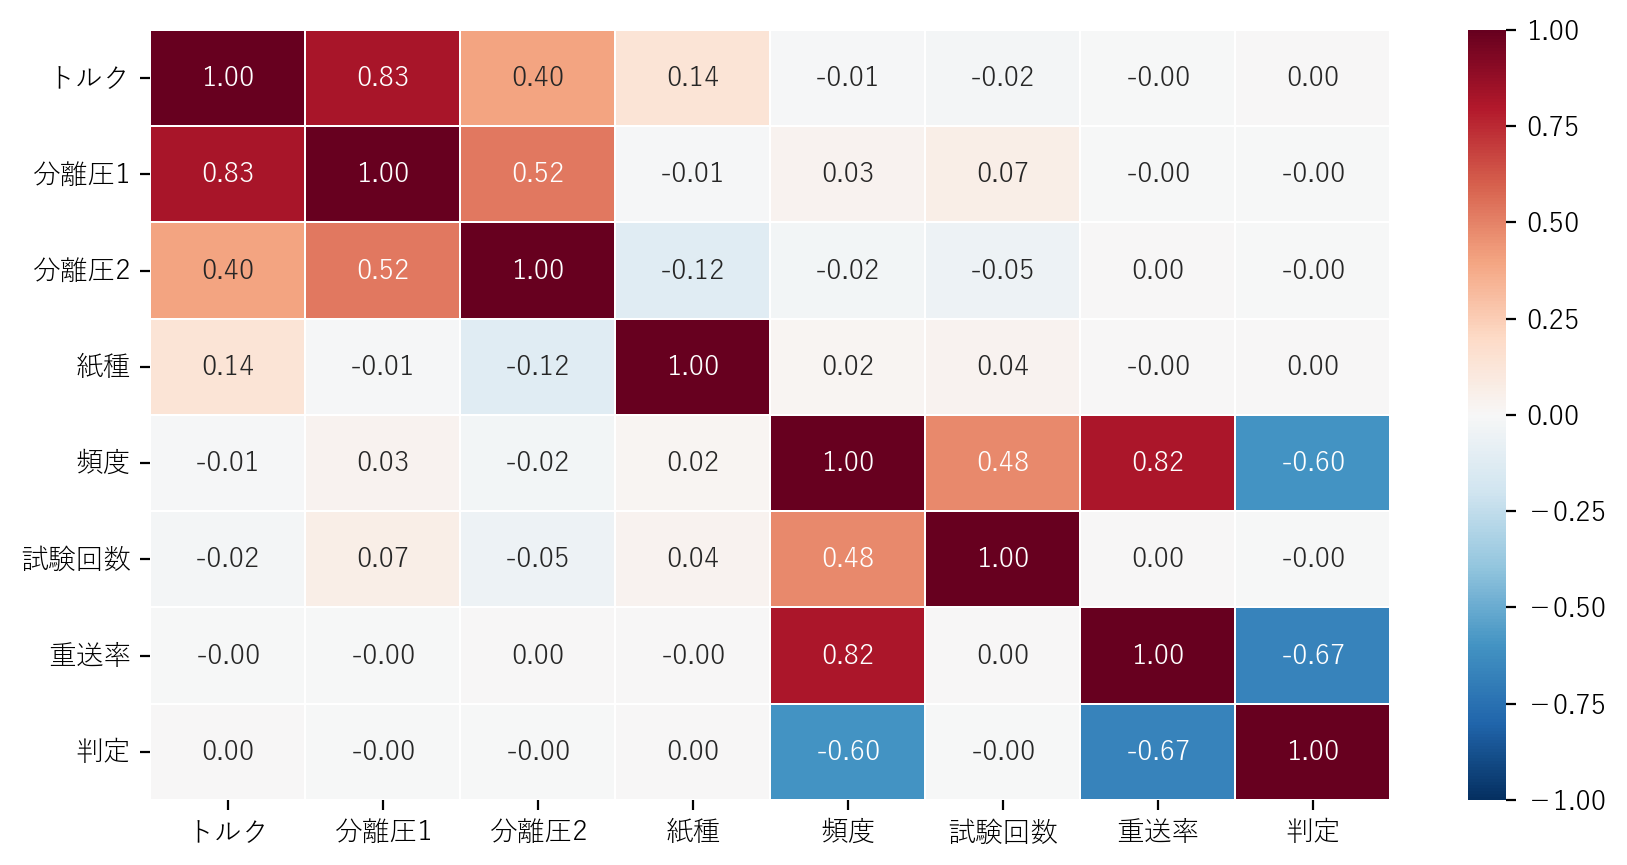

In [19]:
### 相関行列のお化粧（ヒートマップ） ###

# 描画の設定
colormap = plt.cm.RdBu_r                #カラーマップの設定 (RdBu:赤〜青 ⇔ RdBu_r:青〜赤)
plt.rcParams['figure.figsize'] = 10, 5  # Figureサイズの指定

# 相関行列の算出
corr = df.corr(numeric_only=True) #数値以外も含まれている場合には、numeric_only=True を引数に指定

# ヒートマップの描画
sns.heatmap(corr,linewidths=0.1, linecolor='white', #相関行列df.corr()を引数としヒートマップ作成	
            vmax=1.0, vmin=-1.0, cmap=colormap,     #最大値、最小値、カラーマップの指定 
            annot=True, fmt='.2f',                  #各セル内に表示する数値の設定
            # mask=np.triu(corr) #相関行列の右上半分を隠したい場合はこのコメントを解除
           )

            # linewidths/linecolor: 格子線の太さ/色
            # cmap:                 カラーマップの指定
            # vmax/vmin:            最大値/最小値
            # annot:                各要素への数値表示
            # annot_kws={'fontsize':8}: 各要素内に表示する数値の文字サイズを指定
            # fmt='.2f':            各要素内に表示する数値の小数点桁数を指定（'.2f'で小数第二位まで）
            # mask:                 可視化から除外する対象


# データの準備（加工）

## 欠損値の確認

In [20]:
df.isnull().sum()

テストNo    0
トルク      0
分離圧1     0
分離圧2     0
紙種       0
頻度       0
試験回数     0
重送率      0
判定       0
dtype: int64

In [ ]:
# 1つでも欠損値を含む行を抽出
# df[df.isnull().any(axis=1)] #df.isnull().any(axis=1)⋯列方向に1つでも欠損値があればTrueを返す

# ダミー変数化（紙種）

In [21]:
df = pd.get_dummies(df, columns=['紙種'], dtype=int, prefix_sep='')

# クラス数-1のカラムを作成する場合
df = pd.get_dummies(df, columns=['紙種'], dtype=int, prefix_sep='', drop_first=True)

## 判定=1に絞り込む

In [22]:
df_1 = df[df['判定']==1]
df_1

,テストNo,トルク,分離圧1,分離圧2,頻度,試験回数,重送率,判定,紙種1,紙種2,紙種3
0,T001,245,209,40,10,26,0.384615,1,1,0,0
1,T002,245,209,40,10,21,0.476190,1,0,1,0
2,T003,245,209,40,7,11,0.636364,1,0,0,1
3,T004,245,160,40,2,20,0.100000,1,1,0,0
4,T005,245,160,40,8,30,0.266667,1,0,1,0
5,T006,245,160,40,12,30,0.400000,1,0,0,1
6,T007,245,108,40,0,10,0.000000,1,1,0,0
7,T008,245,135,40,0,10,0.000000,1,1,0,0
8,T009,245,135,40,2,20,0.100000,1,0,1,0
9,T010,245,135,40,3,10,0.300000,1,0,0,1


# モデルの構築

## 重回帰分析

In [23]:
### ①ライブラリの読み込み ### 
from sklearn import linear_model # 機械学習パッケージに含まれた回帰分析モジュール"linear_model"を読込

### ②説明変数・目的変数のセット ###
# 説明変数のセット
X = df_1.drop(columns=['重送率', 'テストNo', '頻度', '試験回数', '判定'])

# 目的変数のセット
Y = df_1['重送率']

### ③モデル構築 ###
# 重回帰モデルを作成
model = linear_model.LinearRegression()  # インスタンス化（関数を使える状態にする）
model.fit(X, Y)                          # モデル構築（フィッティング）

LinearRegression()

In [24]:
### ④結果の出力 ###
# 偏回帰係数の出力
display( pd.DataFrame({'Variables':X.columns, 'Coefficients':model.coef_}) )

# 切片の出力
print( '切片:', model.intercept_ )

# 決定係数の出力
print( '決定係数:', model.score(X, Y) )

,Variables,Coefficients
0,トルク,-0.003301
1,分離圧1,0.003109
2,分離圧2,-0.001531
3,紙種1,-0.105457
4,紙種2,-0.022700
5,紙種3,0.128157


切片: 0.6701253629489963
決定係数: 0.7940049495466088


## 標準化した重回帰

### 標準化

In [25]:
from sklearn import preprocessing      # 機械学習パッケージscikit-learnから、データ前処理モジュールの読込

In [26]:
### 標準化 ###
# 説明変数の標準化（Zスコア）
X_standard = preprocessing.scale(X)

# 目的変数の標準化（Zスコア）
Y_standard = preprocessing.scale(Y)

### 標準化した重回帰モデルの構築

In [27]:
### ①ライブラリの読み込み ### 
from sklearn import linear_model # 機械学習パッケージに含まれた回帰分析モジュール"linear_model"を読込

### ②説明変数・目的変数のセット ###
# → 設定済み
# 説明変数のセット
# X = df.drop(columns=['欠陥数'])
# 目的変数のセット
# Y = df['欠陥数']

### ③モデル構築 ###
# 重回帰モデルを作成
model = linear_model.LinearRegression()  # インスタンス化（関数を使える状態にする）
model.fit(X_standard, Y_standard)                          # モデル構築（フィッティング）

LinearRegression()

In [28]:
### ④結果の出力 ###
# 偏回帰係数をデータフレームに格納
df_coef = pd.DataFrame({'Variables':X.columns, 'Coefficients':model.coef_})

# 偏回帰係数の出力
display( df_coef.sort_values('Coefficients') )

# 切片の出力
print( '切片:', model.intercept_ )

# 決定係数の出力
print( '決定係数:', model.score(X_standard, Y_standard) )

,Variables,Coefficients
0,トルク,-1.558879
3,紙種1,-0.197692
2,分離圧2,-0.113344
4,紙種2,-0.044218
5,紙種3,0.238706
1,分離圧1,1.596276


切片: -2.723605217465468e-16
決定係数: 0.7940049495466088


Text(0, 0.5, '偏回帰係数')

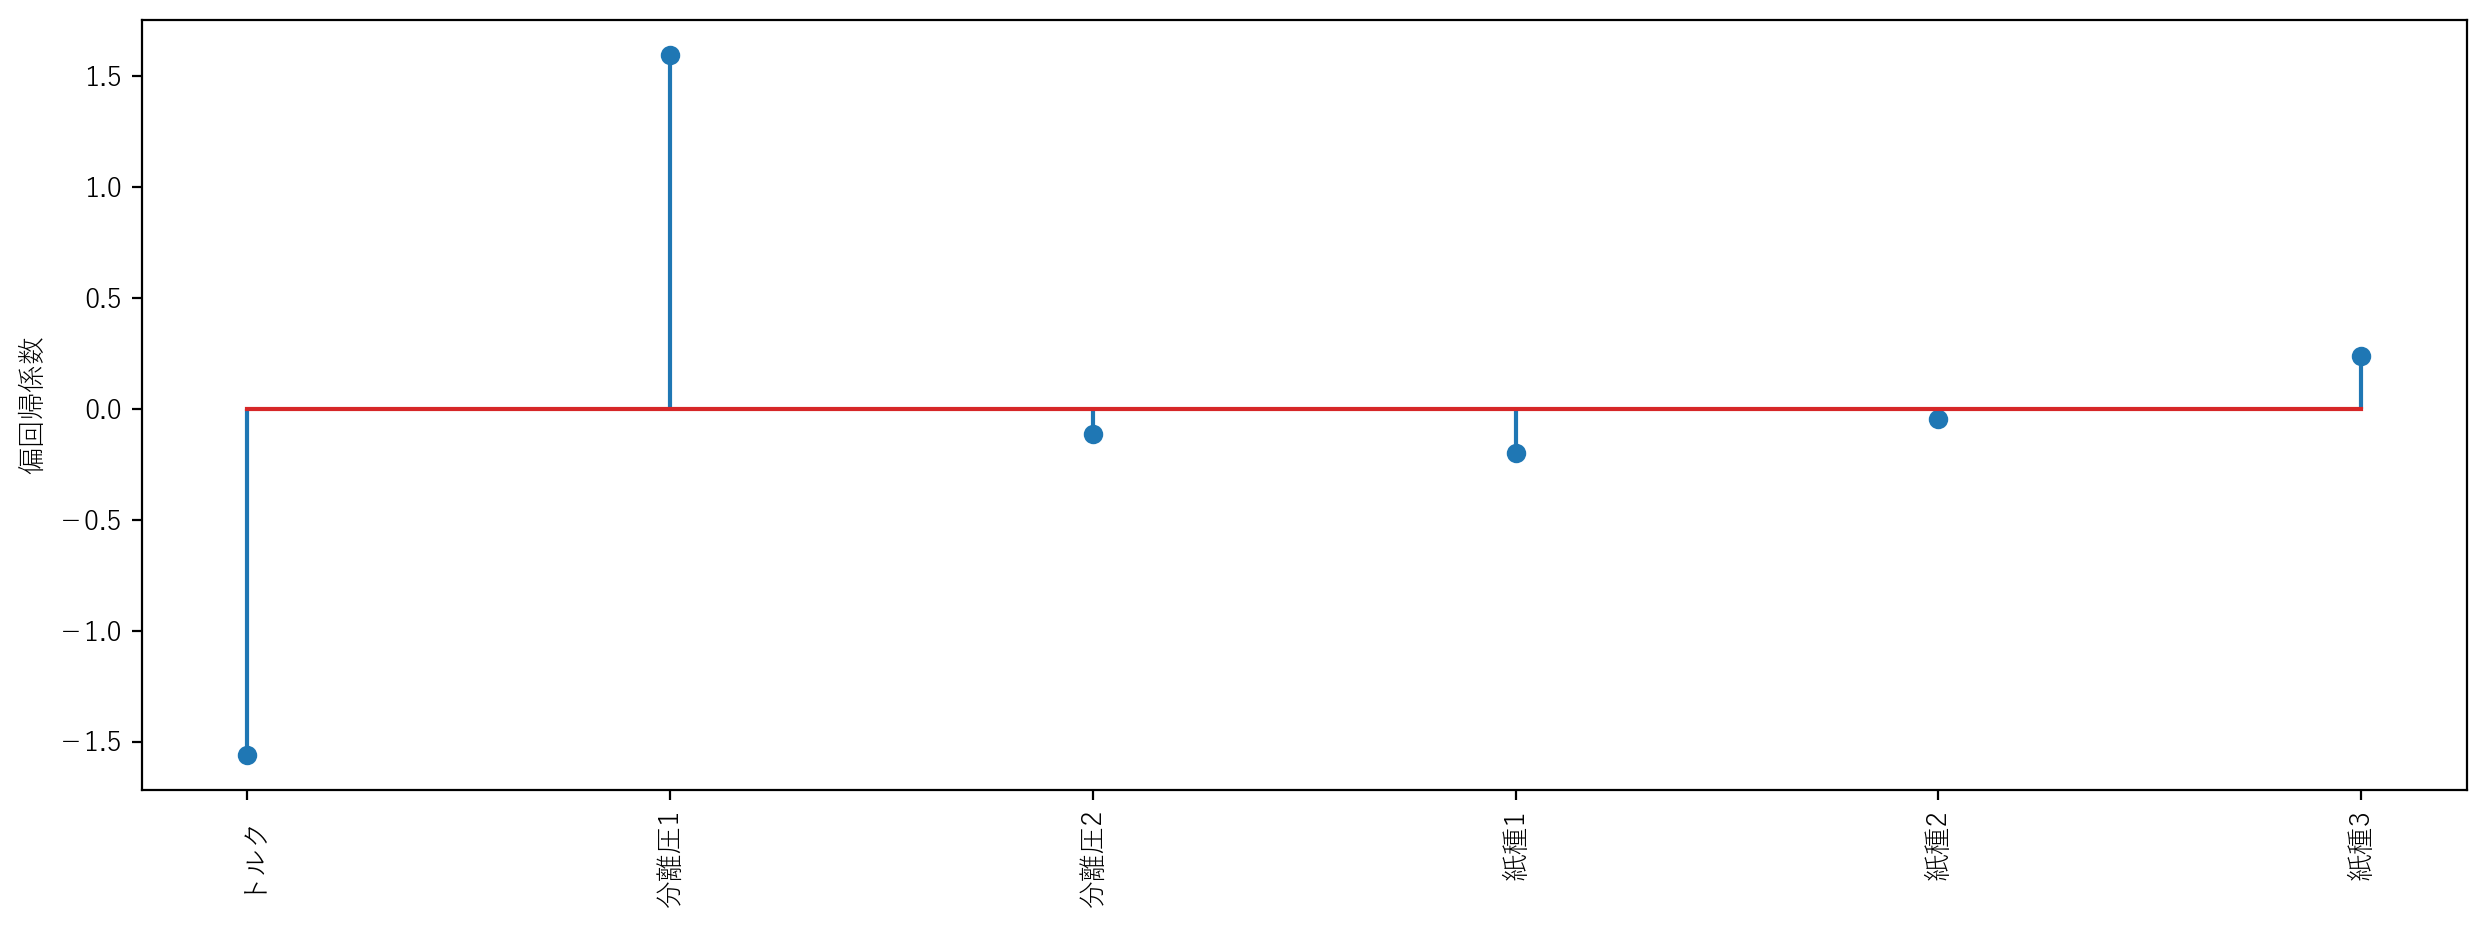

In [29]:
### 回帰係数の大小を視覚的に捉える ###

# Figureサイズの指定
plt.figure(figsize=[15, 5]) #アドホックに当該グラフのみサイズ変更

# 偏回帰係数の傾向をグラフ化
plt.stem(df_coef['Variables'],   #x軸
         df_coef['Coefficients'] #y軸
        )
         
# x軸の目盛文字を90度回転
plt.xticks(rotation=90)
         
# y軸ラベルを表示
plt.ylabel('偏回帰係数')

## 多重共線性のチェック

In [30]:
### VIF統計量を算出 ###

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFを計算
vif = pd.DataFrame() #結果格納用のdataframeを準備
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #VIFを計算しdataframeに格納
vif['変数名'] = X.columns #対応する変数名を格納
 
# VIFの計算結果を画面出力
display(vif)

,VIF,変数名
0,3.445621,トルク
1,3.871681,分離圧1
2,1.409545,分離圧2
3,5.940027,紙種1
4,6.067604,紙種2
5,6.940600,紙種3


Text(0, 0.5, 'VIF')

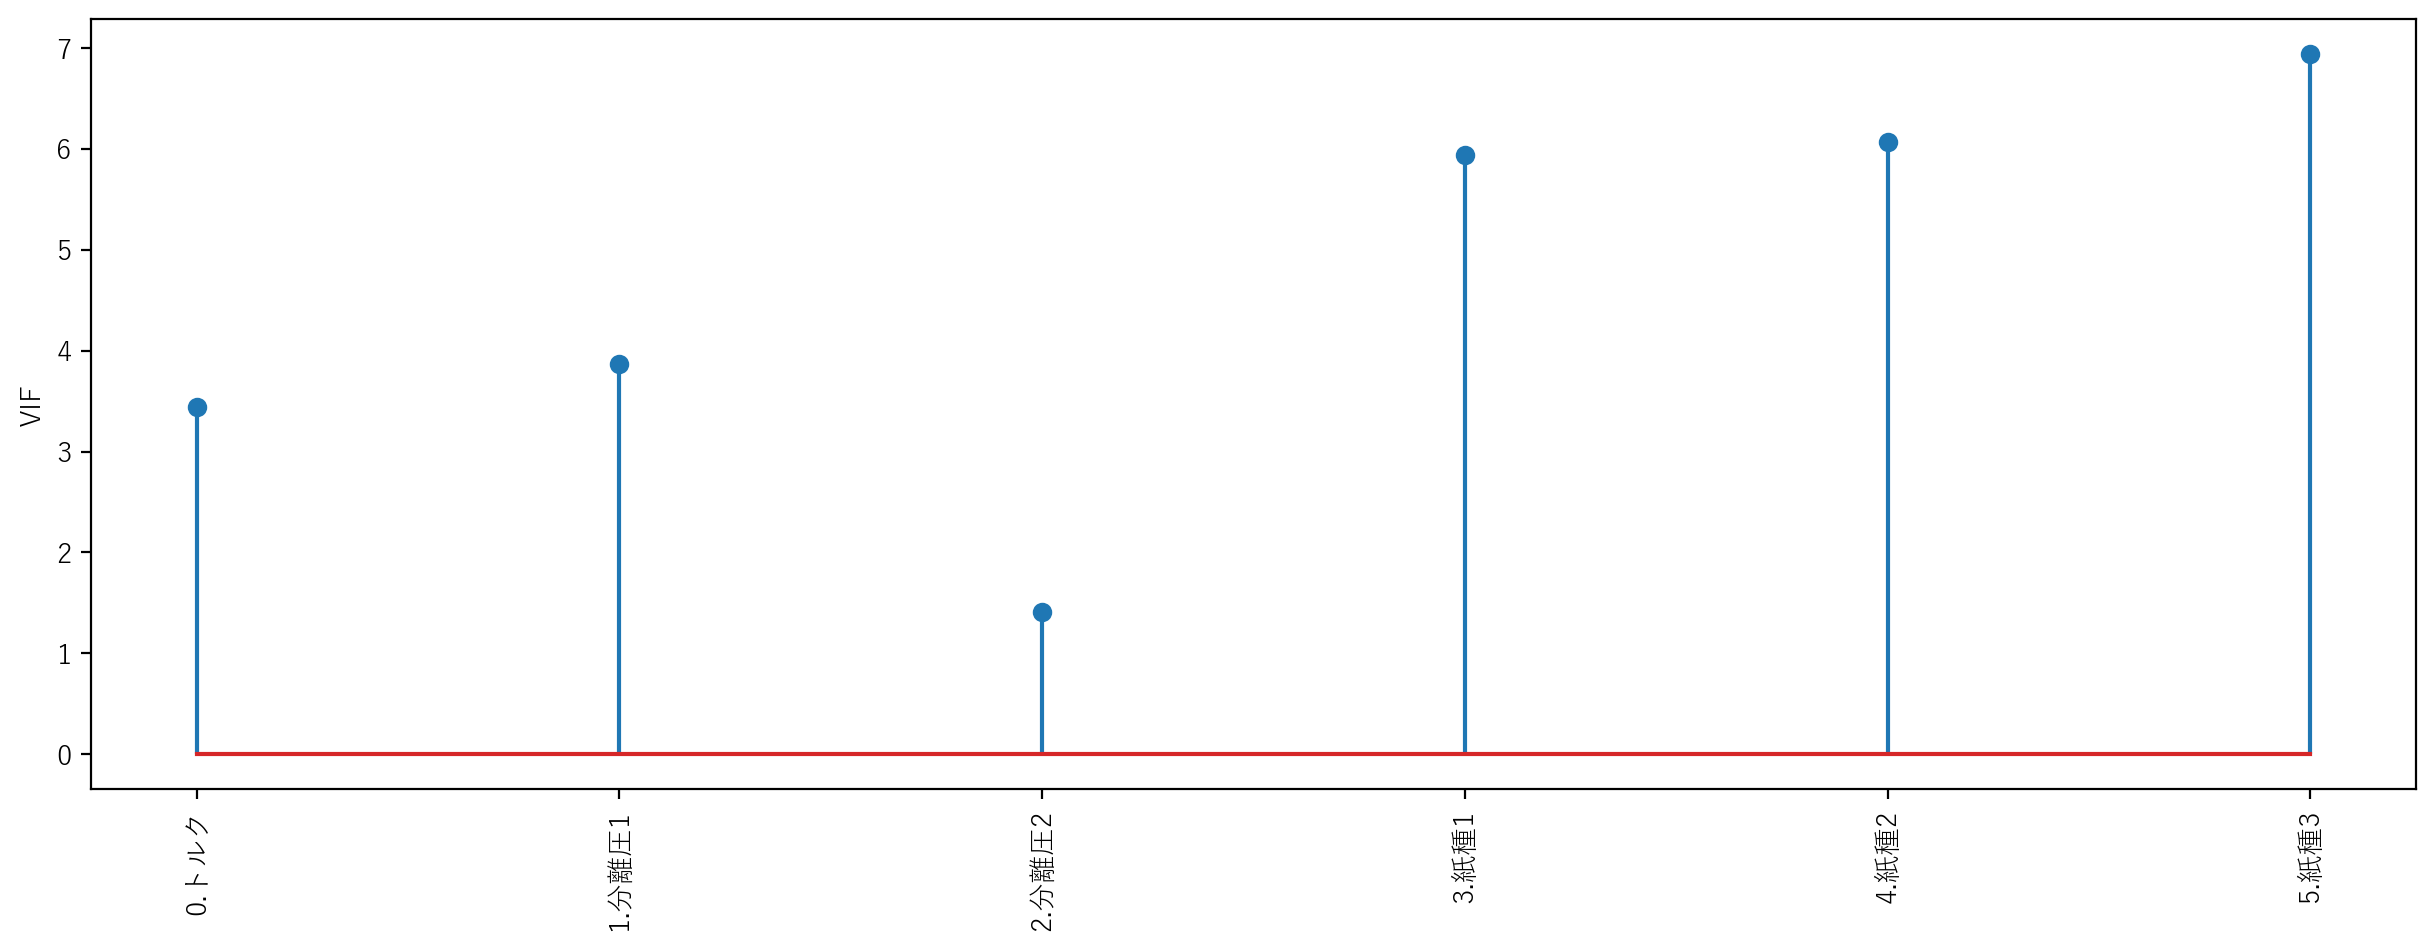

In [31]:
### グラフで視覚的に表示 ###

# Figureサイズの指定
plt.figure(figsize=[15, 5]) #アドホックに当該グラフのみサイズ変更
# VIFの傾向をグラフ化
plt.stem(vif.index.astype(str)+'.'+vif['変数名'], vif['VIF']) #x軸はインデックス番号と変数名を結合して表示
# x軸の目盛文字を90度回転
plt.xticks(rotation=90)
# y軸ラベルを表示
plt.ylabel('VIF')

In [32]:
# VIF>=10の変数を抽出
vif[vif['VIF']>=10].sort_values('VIF', ascending=False)

,VIF,変数名


# サンプル分割による過学習対策¶

## サンプル分割

In [33]:
from sklearn.model_selection import train_test_split

# 学習データ（X_train, Y_train）、テストデータ（X_test, Y_test）に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #テストデータの割合は30%(0.3)にすることが多い

## 学習モデル構築

In [34]:
### ③モデル構築 ###
# 重回帰モデルを作成
model = linear_model.LinearRegression()  # インスタンス化（関数を使える状態にする）
model.fit(X_train, Y_train)              # モデル構築（フィッティング）

LinearRegression()

In [35]:
### ④結果の出力 ###
# 偏回帰係数の出力
display( pd.DataFrame({'Variables':X.columns, 'Coefficients':model.coef_}).sort_values('Coefficients', ascending=False)  )

# 切片の出力
print( '切片:', model.intercept_ )

# 決定係数の出力
print( '決定係数:', model.score(X_train, Y_train) )

,Variables,Coefficients
5,紙種3,0.132307
1,分離圧1,0.002977
2,分離圧2,-0.000972
0,トルク,-0.003236
4,紙種2,-0.009964
3,紙種1,-0.122343


切片: 0.6548204990174287
決定係数: 0.7734016149628768


## テストデータでの予測精度

In [36]:
# 構築済みの学習モデルにテストデータを投入し、決定計数を算出
model.score(X_test, Y_test)

0.8268325612529115

## テストデータでの予測値出力

In [37]:
# model.predictに説明変数を入れるとYの予測値を出力できる
Y_test_pred = model.predict(X_test)
Y_test_pred

array([ 0.022333  ,  0.29533838,  0.23960096, -0.08018847,  0.28386969,
       -0.20248222,  0.46914917,  0.21507945,  0.32296779,  0.23994573,
        0.3519797 ,  0.36629885,  0.0838334 ,  0.49425036,  0.47775007,
        0.54355711,  0.61797827])

In [38]:
# 予測値を求めた後でr2_scoreを用いて予測精度を算出することも可能
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred)

0.8268325612529115

## 応用編：あるXに対するYを予測

In [39]:
model.predict([[245, 209, 40, 1, 0, 0]]) #X=['トルク', '分離圧1', '分離圧2', '紙種1', '紙種2', '紙種3']

# pd.DataFrame([[245, 209, 40, 1, 0, 0]], columns=X.columns)

C:\Users\B221228\Desktop\analysis_2\ds_intermediate\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.32296779])

# クロスバリデーション（交差検証）

## 関連パッケージの読み込み

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

## k分割クロスバリデーションの設定

In [41]:
# クロスバリデーションの方式設定
cv = KFold(n_splits=5, shuffle=True, random_state=0) #分割数kは "n_splits" で指定
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) #層化k分割クロスバリデーション（不均衡データ用）

## k分割クロスバリデーションの実行

In [42]:
### 回帰分析用 ###
cross_r2 = cross_val_score(model, X, Y, cv=cv, scoring='r2') #scoringで評価指標を指定
print(cross_r2)

### クラス分類用 ###
# accuracy_value =  cross_val_score(model, X, Y, cv=cv, scoring='accuracy')
# precision_value = cross_val_score(model, X, Y, cv=cv, scoring='precision')
# recall_value =    cross_val_score(model, X, Y, cv=cv, scoring='recall')
# f1_value =        cross_val_score(model, X, Y, cv=cv, scoring='f1')

# print( 'accuracy = ',  accuracy_value )
# print( 'precision = ', precision_value )
# print( 'recall = ',  recall_value)
# print( 'f1 score = ', f1_value )

[0.61510577 0.76880083 0.1869852  0.80681325 0.77785533]


In [43]:
# 最終的に各試行の平均値を取る
cross_r2.mean()

np.float64(0.6311120758912898)

### 参考：scoring-parameterの種類一覧
https://scikit-learn.org/stable/modules/model_evaluation.html

# パラメーターサーチ（グリッドサーチ）

## ニューラルネットワークによる予測

### モデルの構築

In [ ]:
neural_model = MLPRegressor( hidden_layer_sizes=(100),  activation='relu') 

In [44]:
# ニューラルネットワークのライブラリ読み込み
from sklearn.neural_network import MLPRegressor #scikit-learnパッケージ内の ニューラルネットワークのモジュールより、
                                                #多層パーセプトロン (MLP) 回帰のクラスを読込

# ニューラルネットワークモデル構築
neural_model = MLPRegressor( random_state=0, hidden_layer_sizes=(100) )   #インスタンス化（関数を使える状態にする）
            #パラメータの説明：
            # random_state: 乱数のシード値。指定することで再現性を担保
            # hidden_layer_sizes=(100,) は隠れ層1、ノード数100を意味する

model.fit(X_standard, Y_standard)  #モデル構築（フィッティング
                                   #※一般にニューラルネットワークでは標準化（もしくは正規化）した方が学習コストが下がると言われている

LinearRegression()

### モデルの評価

In [45]:
# モデル予測値の出力
Y_pred = model.predict(X_standard)

# 精度の出力
model.score(X_standard, Y_standard)

0.7940049495466088

In [ ]:
#参考：各種パラメータのデフォルト値
# MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#        beta_2=0.999, early_stopping=False, epsilon=1e-08,
#        hidden_layer_sizes=(100,), learning_rate='constant',
#        learning_rate_init=0.001, max_iter=200, momentum=0.9,
#        nesterovs_momentum=True, power_t=0.5, random_state=None,
#        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
#        verbose=False, warm_start=False)

## グリッドサーチ

In [46]:
# パッケージの読み込み
from sklearn.model_selection import GridSearchCV

# グリッドサーチを行うためのハイパーパラメーターセット
parameters = [{
    'hidden_layer_sizes': [(100), (100,100), (200,200)],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'activation': ['logistic', 'tanh', 'relu']
}]

#グリッドサーチ実行
grid_model = GridSearchCV(MLPRegressor(), parameters, cv=3) #cvは交差検証の回数
grid_model.fit(X_train, Y_train)

print('学習データ精度', grid_model.score(X_train, Y_train))
print('テストデータ精度', grid_model.score(X_test, Y_test))

# 精度ベストのパラメーターを持つ回帰モデルを出力
print(grid_model.best_estimator_)

C:\Users\B221228\Desktop\analysis_2\ds_intermediate\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\B221228\Desktop\analysis_2\ds_intermediate\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\B221228\Desktop\analysis_2\ds_intermediate\.venv\lib\site-packages\sklearn\neural_network\_multilayer

学習データ精度 0.958273787911373
テストデータ精度 0.6836130738975807
MLPRegressor(activation='logistic', hidden_layer_sizes=(200, 200))


In [47]:
print(grid_model.best_score_)
print(grid_model.best_params_)

0.6136849358120826
{'activation': 'logistic', 'hidden_layer_sizes': (200, 200), 'solver': 'adam'}


In [ ]:
# 参考：solverの設定値について
# lbfgs (limited memory BFGS):省メモリの準ニュートン法
# sgd (Stochastic Gradient Descent): 確率的勾配降下法
# adam (Adaptive moment estimation): 指数移動平均により期待値を計算する方法 ※デフォルト値

# 参考：activation（活性化関数）の設定値について
# logistic: ロジスティック関数
# tanh: ハイパボリックタンジェント
# relu: relu関数 (Rectified Linear Unit) ※デフォルト値